# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assesing Data</a></li>
<li><a href='#clean'>Cleaning Data</a></li>
<li><a href='#store'>Storing Data</a></li>
<li><a href="#analysis">Analyzing and Visualizing</a></li>
</ul>

### Introduction
Dataset Description
The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10.

<a id='gather'></a>

# DATA GATHERING

Data Gathering
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

1.Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [20]:
#import relevant libraries

import tweepy
import numpy as np
import requests
import os
import pandas as pd
import json
from timeit import default_timer as timer
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
twitter_archive = pd.read_csv(r'twitter-archive-enhanced.csv')

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. download the tweet image prediction (image_predictions.tsv)

In [21]:
file_name = 'image-predictions.tsv'

# Fetch data if file if doesn't exist
if not os.path.isfile(file_name):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)



In [22]:
#Save the response to 'image-predictions.tsv' file if doesn't exist
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [25]:
# Load the 'image-predictions.tsv' file into a dataframe
image_predictions = pd.read_csv(file_name, sep='\t')

In [26]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
%run ./access_codes.ipynb

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 297


Success
895: 759197388317847553
Success
896: 759159934323924993
Success
897: 759099523532779520
Success
898: 759047813560868866
Success
899: 758854675097526272
Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success


Success
1147: 727155742655025152
Success
1148: 726935089318363137
Success
1149: 726887082820554753
Success
1150: 726828223124897792
Success
1151: 726224900189511680
Success
1152: 725842289046749185
Success
1153: 725786712245440512
Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
11

Success
1396: 699801817392291840
Success
1397: 699788877217865730
Success
1398: 699779630832685056
Success
1399: 699775878809702401
Success
1400: 699691744225525762
Success
1401: 699446877801091073
Success
1402: 699434518667751424
Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
14

Success
1645: 683852578183077888
Success
1646: 683849932751646720
Success
1647: 683834909291606017
Success
1648: 683828599284170753
Success
1649: 683773439333797890
Success
1650: 683742671509258241
Success
1651: 683515932363329536
Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
16

Rate limit reached. Sleeping for: 341


Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
18

Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
20

Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
23

In [12]:
#read the json file into a python dictionary

df_list=[]
tweets=[]
tweet_id=[]
retweet_count=[]
favorite_count =[]
location = []

with open(r'tweet_json.txt') as file:
    
    for line in file:
        
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        
        df_list.append({'tweet_id':tweet_id,
                'Likes':favorite_count,
                'Retweets':retweet_count,
                       })
        

In [13]:
df_new = pd.DataFrame(df_list,columns =['tweet_id','Likes','Retweets'])


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id    2327 non-null int64
Likes       2327 non-null int64
Retweets    2327 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<a id='assess'></a>
## Assessing Data
In this section,I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**.

In [28]:
# assessing the data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues

twitter_archive table

    1. The twitters archive has retweet

    2. Tweet_id is float instead of string

    3.timestamp is string instead of datetime
    
    4. Remove the the empty cells in the 'expanded_url'
    
    5. Remove Dogs named 'none',not'and'officially'
    
    6. Capitalize the first letter of the name column

 image_predictions table
 
    7. Tweet_id is fload not string

    8. The casing of the p1, p2, p3 is inconsistent
    
   
    
 twitter api json file
 
     9 Twitter_id is float instead of string
     
     
 ### TIDINESS ISSUES
    1.remove the url from the text column
    
    2. add dog_stage column

<a id='clean'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 


In [19]:
#make a copy of the data sets

twitter_archive_copy = twitter_archive

image_predictions_copy = image_predictions

df_new_copy = df_new

### Issue 1: The twitters archive has retweet

#### define: remove all retweets from the dataset

#### CODE:

In [20]:
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notna()].index, inplace = True)

In [21]:
#drop the columns that is related to retweets
twitter_archive_copy = twitter_archive_copy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### TEST

In [22]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### ISSUE 2: tweet_id  is float instead of string

#### DEFINE: Change the tweet_id to string

#### CODE

In [23]:
twitter_archive_copy = twitter_archive_copy.astype({'tweet_id': str}, errors='raise')

#### TEST

In [24]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


### ISSUE 3: Timestamp is string

#### DEFINE: Change the datatype of the timestamp from string to datetime

#### CODE:

In [25]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

#### TEST:

In [26]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 220.9+ KB


### ISSUE 4: Remove the the empty cells in the 'expanded_url' column

#### DEFINE : remove the na rows in the dataset

### CODE

In [27]:
twitter_archive_copy = twitter_archive_copy.dropna()

#### TEST:

In [28]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 215.0+ KB


### ISSUE 5: Remove Dogs named 'none', 'not' and 'officially'

#### DEFINE : Drop the rows with None, not and officially as name

#### CODE :

In [29]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.name != 'None']

In [30]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.name != 'not']

In [31]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.name != 'officially']

### TEST :

In [32]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 2354
Data columns (total 12 columns):
tweet_id              1492 non-null object
timestamp             1492 non-null datetime64[ns, UTC]
source                1492 non-null object
text                  1492 non-null object
expanded_urls         1492 non-null object
rating_numerator      1492 non-null int64
rating_denominator    1492 non-null int64
name                  1492 non-null object
doggo                 1492 non-null object
floofer               1492 non-null object
pupper                1492 non-null object
puppo                 1492 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 151.5+ KB


### ISSUE 6 : Capitalize the first letter of the name column

#### DEFINE : Capitalize the first letter of the name column

#### CODE:

In [33]:
twitter_archive_copy['name'] = twitter_archive_copy['name'].str.title()

#### TEST :

In [34]:
twitter_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


### ISSUE 7 : Tweet_id is float

#### DEFINE : change tweet_id datatype to str

#### CODE

In [35]:
image_predictions_copy = image_predictions_copy.astype({'tweet_id': str}, errors='raise')

#### TEST : 

In [36]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### ISSUE 8: The casing of the p1, p2, p3 is inconsistent

#### DEFINE : Change the casing to title, in other words capitialize each word 

#### CODE :

In [37]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.title()
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.title()
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.title()

#### TEST :

In [38]:
image_predictions_copy['p1']

0       Welsh_Springer_Spaniel
1                      Redbone
2              German_Shepherd
3          Rhodesian_Ridgeback
4           Miniature_Pinscher
                 ...          
2070                    Basset
2071               Paper_Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

In [39]:
image_predictions_copy['p2']

0                   Collie
1       Miniature_Pinscher
2                 Malinois
3                  Redbone
4               Rottweiler
               ...        
2070      English_Springer
2071    Labrador_Retriever
2072              Malamute
2073              Pekinese
2074                 Bagel
Name: p2, Length: 2075, dtype: object

In [40]:
image_predictions_copy['p3']

0                 Shetland_Sheepdog
1               Rhodesian_Ridgeback
2                        Bloodhound
3                Miniature_Pinscher
4                          Doberman
                   ...             
2070    German_Short-Haired_Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2075, dtype: object

### ISSUE 9: Tweet_id is float instead of string

#### DEFINE : Change the datatype of the tweet_id to str

#### CODE :

In [41]:
df_new_copy = df_new_copy.astype({'tweet_id': str}, errors='raise')

#### TEST :

In [42]:
df_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id    2327 non-null object
Likes       2327 non-null int64
Retweets    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## TIDINESS

### ISSUE 1: remove the url from the text column

#### DEFINE : Remove the url in the text column of the twitter_archive data set

#### CODE :

In [43]:
twitter_archive_copy[['text1','Last']] = twitter_archive_copy.text.apply(lambda x: pd.Series(str(x).split(". 1")))

In [44]:
twitter_archive_copy.drop(columns = ['text','Last'],inplace = True)

In [45]:
twitter_archive_copy.rename(columns={'text1':'text'},inplace = True)

#### TEST :

In [46]:
twitter_archive_copy.tail()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text
2349,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666051853...,2,10,An,None,None,None,None,This is an odd dog. Hard on the outside but lo...
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666050758...,10,10,A,None,None,None,None,This is a truly beautiful English Wilson Staff...
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6,10,A,None,None,None,None,This is a purebred Piers Morgan. Loves to Netf...
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...,9,10,A,None,None,None,None,Here is a very happy pup. Big fan of well-main...
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7,10,A,None,None,None,None,This is a western brown Mitsubishi terrier. Up...


### ISSUE 2: add dog_stage column

#### DEFINE : Add likes and retweets clumns to the twitter_archive_copy datasets

#### CODE :


In [47]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 2354
Data columns (total 12 columns):
tweet_id              1492 non-null object
timestamp             1492 non-null datetime64[ns, UTC]
source                1492 non-null object
expanded_urls         1492 non-null object
rating_numerator      1492 non-null int64
rating_denominator    1492 non-null int64
name                  1492 non-null object
doggo                 1492 non-null object
floofer               1492 non-null object
pupper                1492 non-null object
puppo                 1492 non-null object
text                  1492 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 151.5+ KB


In [48]:
twitter_archive_copy.shape

(1492, 12)

In [49]:
df = pd.merge(twitter_archive_copy,df_new_copy)

#### TEST :

In [50]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'text', 'Likes', 'Retweets'],
      dtype='object')

In [51]:
df.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text,Likes,Retweets
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,33803,7001
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,29314,5298
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,22042,3477
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal,36919,7222
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,35298,7754


In [52]:
df.shape

(1485, 14)

In [ ]:
twitter_archive_copy['dog_type'].unique()

In [83]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB



<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
twitter_archive_copy.to_csv('twitter_archive_master.csv')

<a id='analysis'></a>
## VISUALIZATION AND ANALYSIS

In [150]:
def label (x,y,z):
    """
    Args:
    x(str): x-axis title
    y(str): y-axis title
    z(str): main title
    
    returns:
    None
    
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
   

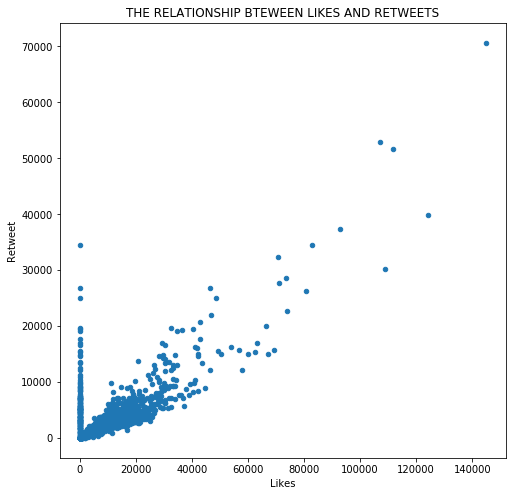

In [152]:
df_new_copy.plot.scatter(x = 'Likes', y = 'Retweets', s = 20, figsize=(8,8))
label("Likes","Retweet",'THE RELATIONSHIP BTEWEEN LIKES AND RETWEETS');
plt.savefig('file 1.jpg',dpi=100)
plt.show()

In [154]:
#the average likes doggo 
doggo = df.groupby('doggo')
doggo2 = doggo.get_group('doggo')
avg_likes_doggo = doggo2['Likes'].mean()
mean_rating_doggo = doggo2['rating_numerator'].mean()
mean_rating_doggo


11.977272727272727

In [155]:
floofer = df.groupby('floofer')
floofer2 = floofer.get_group('floofer')
avg_likes_floofer = floofer2['Likes'].mean()
mean_rating_floofer = floofer2['rating_numerator'].mean()
mean_rating_floofer

11.6

In [156]:
pupper = df.groupby('pupper')
pupper2 = pupper.get_group('pupper')
avg_likes_pupper = pupper2['Likes'].mean()
mean_rating_pupper = pupper2['rating_numerator'].mean()
mean_rating_pupper

10.598540145985401

In [157]:
puppo = df.groupby('puppo')
puppo2 = puppo.get_group('puppo')
avg_likes_puppo = puppo2['Likes'].mean()
mean_rating_puppo = floofer2['rating_numerator'].mean()



In [167]:
df_set = [['doggo',avg_likes_doggo],['floofer',avg_likes_floofer],['pupper',avg_likes_pupper],['puppo',avg_likes_puppo]]

df_1 = pd.DataFrame(df_set,columns = ['dog_stage','avg_likes'])
)


In [172]:
df_1['dog_stage']

0      doggo
1    floofer
2     pupper
3      puppo
Name: dog_stage, dtype: object

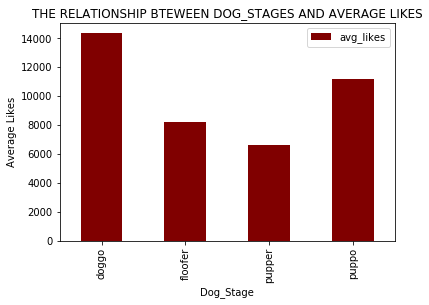

In [184]:
df_1.plot.bar('dog_stage', 'avg_likes', color ='maroon')
label("Dog_Stage","Average Likes",'THE RELATIONSHIP BTEWEEN DOG_STAGES AND AVERAGE LIKES')
plt.savefig('file2.jpg', dpi = 100)
plt.show()


In [173]:
df_set2 = [['doggo',mean_rating_doggo],['floofer',mean_rating_floofer],['pupper',mean_rating_pupper],['puppo',mean_rating_puppo]]

df_2 = pd.DataFrame(df_set2,columns = ['dog_stage','mean_rating'])

In [145]:
df_2

,dog_stage,mean_rating
0,doggo,11.977273
1,floofer,11.600000
2,pupper,10.598540
3,puppo,11.600000


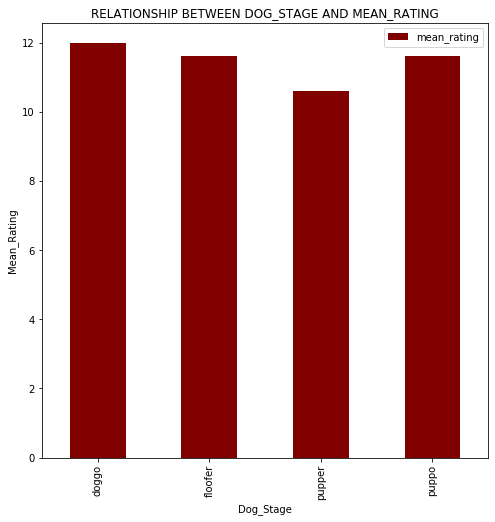

In [188]:
df_2.plot.bar('dog_stage','mean_rating', color = 'maroon', figsize = (8,8))
label('Dog_Stage','Mean_Rating','RELATIONSHIP BETWEEN DOG_STAGE AND MEAN_RATING')
plt.savefig('file3.jpg')
plt.show()

INSIGHTS

1.	The Likes and Retweets are positively correlated

2.	Dogs in the doggo dog stage receive the most likes

3.  The professional raters are unbiased as the trend of their ratings are similar to the audience opinion